# Exploration MVP

In [1]:
import acquire as ac
import prepare as prep
import evaluate as ev

import seaborn as sns  # Used in creating visuals and plots
import matplotlib.pyplot as plt  # Used in creating visuals and plots
from scipy import stats  # For stats testing.

import pandas as pd
import numpy as np

In [2]:
zil = ac.zillow_data()

In [3]:
zil = prep.prep_zillow(zil)

In [4]:
zil.head()

,bedrooms,bathrooms,sq_ft,price
0,4,2.0,3633.0,296425.0
1,3,4.0,1620.0,847770.0
2,3,2.0,2077.0,646760.0
3,0,0.0,1200.0,5328.0
4,0,0.0,171.0,6920.0


SPLIT DATA BEFORE EXPLORE

In [5]:
zil, val, test = prep.train_val_test(zil)

### Bedrooms

<Axes: xlabel='price', ylabel='Count'>

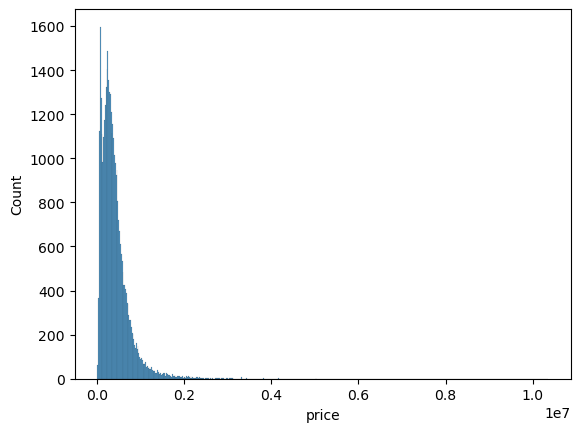

In [6]:
sns.histplot(zil, x='price')

<Axes: xlabel='bedrooms', ylabel='price'>

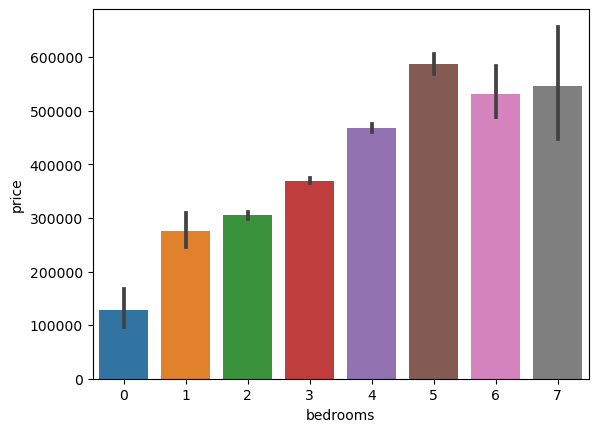

In [7]:
sns.barplot(zil, x='bedrooms', y='price')

In [8]:
for bath in zil.sort_values('bedrooms').bedrooms.unique():
    print(f'{bath}      {zil.price[zil.bedrooms == bath].mean()}')

0      128370.27058823529
1      275329.7617866005
2      305392.17022664275
3      369359.91565297224
4      468156.5598928093
5      587309.3950348432
6      531412.993006993
7      546392.9230769231


Perform stats test to see if houses with more bedrooms and less bedrooms have different costs than the average house

In [37]:
six_plus = zil[zil.bedrooms >= 6].price
average = zil.price.mean()

In [10]:
average

401289.12335930276

spearmans r same as pearson but non normal distribution

mannwhiteney for non normal distribution

parametric is used to descrive the type of test.

data is normaly distributed




In [38]:
t, p = stats.ttest_1samp(six_plus, average)
t, p

(4.629260952830436, 5.54313279267335e-06)

In [12]:
ev.check_ttest(t, p)

There is a signifcant result. P-value was nan.
T-value was less than 0. With a value of nan.


In [39]:
one_bed = zil[zil.bedrooms == 1].price

In [40]:
t, p = stats.ttest_1samp(one_bed, average)
ev.check_ttest(t, p)

There is a signifcant result. P-value was 0.0.
T-value was less than 0. With a value of -9.02.


### Bathrooms

<Axes: xlabel='bathrooms', ylabel='price'>

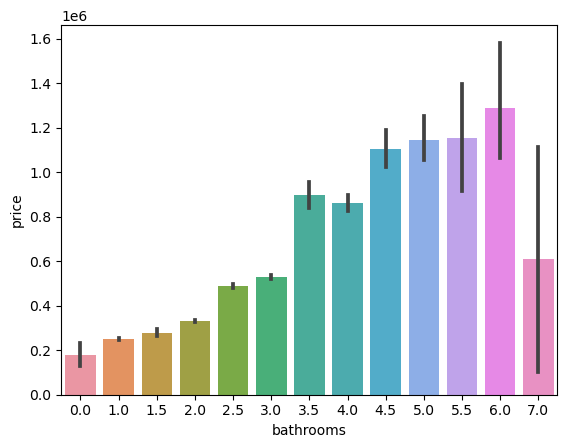

In [15]:
sns.barplot(zil.sort_values('bathrooms'), x='bathrooms', y='price')

In [16]:
zil.sort_values('bathrooms')

,bedrooms,bathrooms,sq_ft,price
24829,0,0.0,2126.0,134118.0
23938,1,0.0,260.0,9265.0
2285,0,0.0,1776.0,79574.0
32854,0,0.0,204.0,40270.0
15866,0,0.0,894.0,103425.0
...,...,...,...,...
15160,5,6.0,3759.0,833642.0
3176,4,6.0,3852.0,505934.0
49528,5,6.0,2640.0,536677.0
1892,5,7.0,3736.0,1115013.0


In [17]:
zil.bathrooms[zil.bathrooms == bath]

11119    7.0
1892     7.0
Name: bathrooms, dtype: float64

In [18]:
for bath in zil.sort_values('bathrooms').bathrooms.unique():
    print(f'{bath}      {zil.price[zil.bathrooms == bath].mean()}')

0.0      176780.28735632185
1.0      250071.10339256865
1.5      278096.2712477396
2.0      330967.743672181
2.5      488286.4384030418
3.0      529092.7244024032
3.5      897731.4153846154
4.0      862277.1463223788
4.5      1105115.2673267326
5.0      1145984.3190661478
5.5      1153015.2142857143
6.0      1289536.5862068965
7.0      609227.5


### Square Feet

<Axes: xlabel='sq_ft', ylabel='price'>

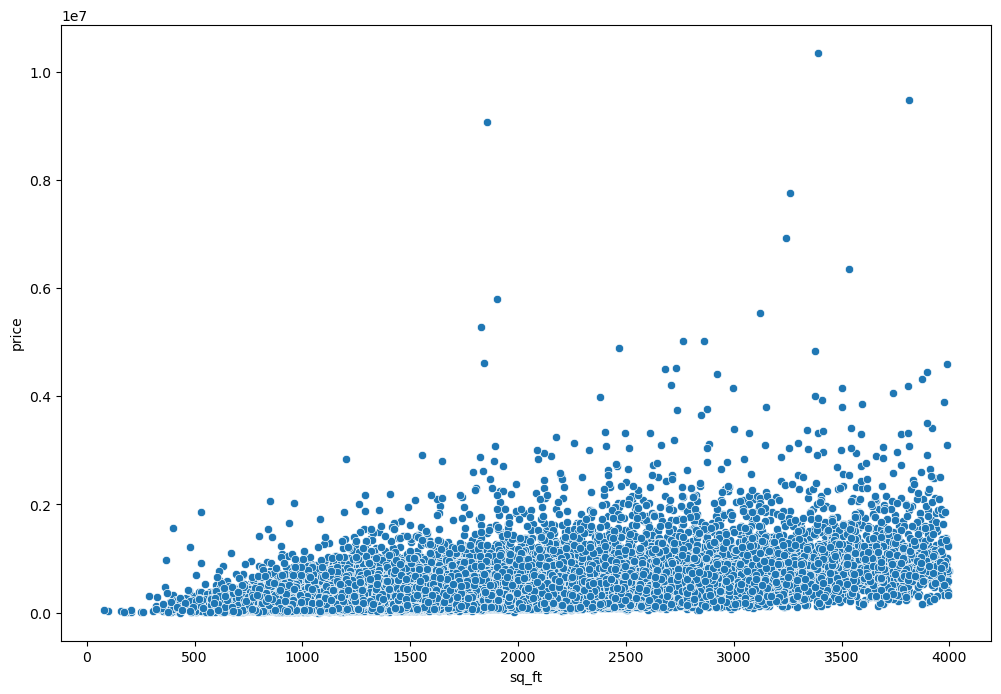

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=zil, x='sq_ft', y='price')

In [20]:
r, p = stats.pearsonr(zil.sq_ft, zil.price)

In [21]:
ev.check_pearson(r,p)

There is a low positive correlation. R-value was 0.5.
There is a signifcant result. P-value was 0.0.


In [22]:
zil = ac.zillow_data()

In [23]:
rename = {'bedroomcnt': 'bedrooms',  # Create a dictionary for new column names
                  'bathroomcnt': 'bathrooms',
                  'calculatedfinishedsquarefeet': 'sq_ft',
                  'taxvaluedollarcnt': 'price'}
zil = zil.rename(columns=rename)  # Rename colums using dictionary

In [24]:
len(zil[zil.bedrooms <= 5])/len(zil)

0.9853883894996955

In [25]:
len(zil[zil.bathrooms <= 3.5])/len(zil)

0.9257959388317875

In [26]:
len(zil[zil.sq_ft <= 3700])/len(zil)

0.9572574580095262

In [27]:
len(zil[zil.price <= 1300_000])/len(zil)

0.957167926082441

# Advanced explore

In [28]:
zil = ac.zillow_data(True)
zil = prep.prep_zillow(mvp=False, df=zil)
zil, val, test = prep.train_val_test(zil)

In [29]:
zil.head(3)

,bedrooms,bathrooms,sq_ft,price,pools,garages,fireplaces,fips,year,lot_sq_ft
31158,4,2.5,1707.0,657000.0,0,2,0,Orange County,1994,3150.0
26388,2,1.0,960.0,57857.0,0,0,0,Los Angeles County,1941,6854.0
26578,3,3.0,2353.0,526693.0,1,0,0,Los Angeles County,1951,16045.0


<Axes: xlabel='price', ylabel='Count'>

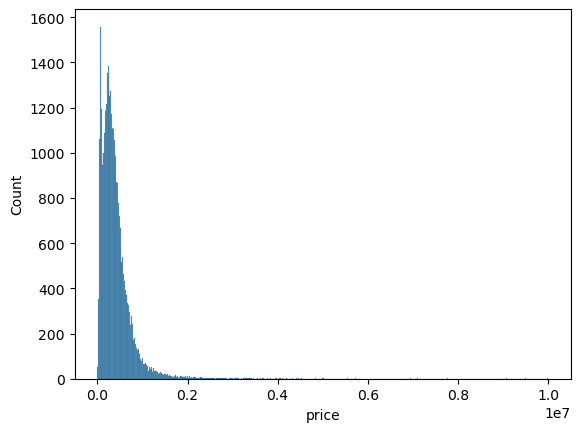

In [30]:
sns.histplot(zil, x='price')

<Axes: xlabel='lot_sq_ft', ylabel='price'>

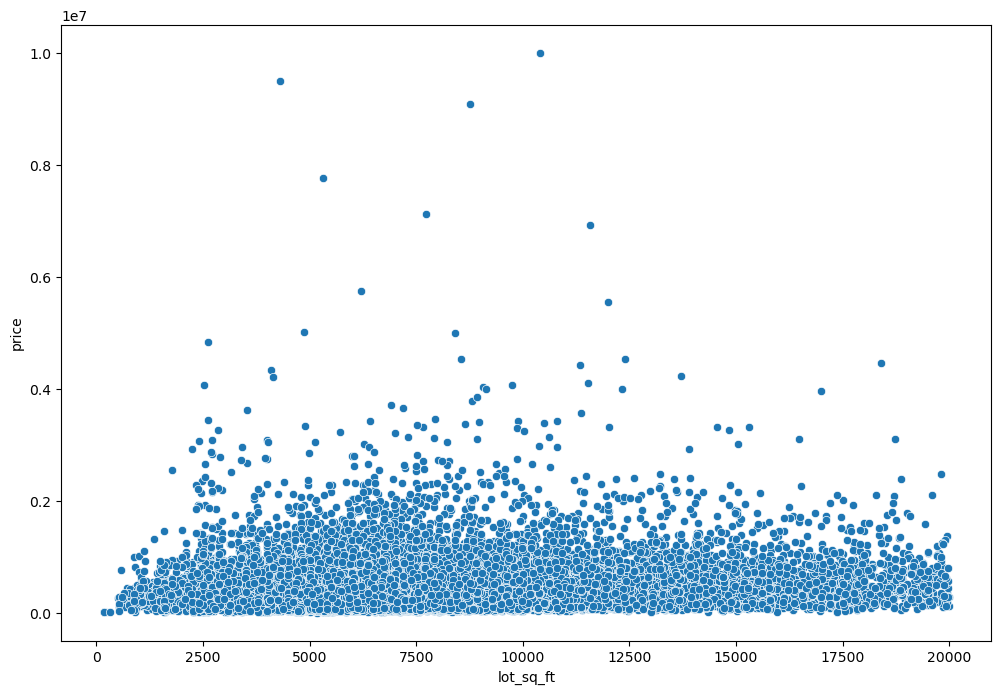

In [31]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=zil, x='lot_sq_ft', y='price')

<Axes: xlabel='year', ylabel='price'>

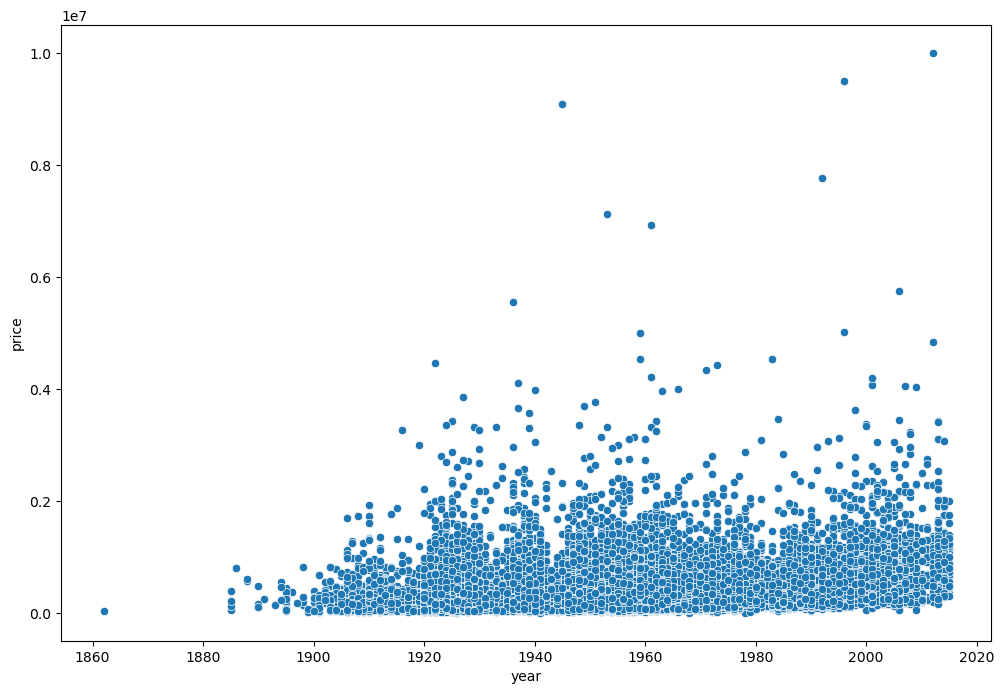

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=zil, x='year', y='price')

<Axes: xlabel='fireplaces', ylabel='price'>

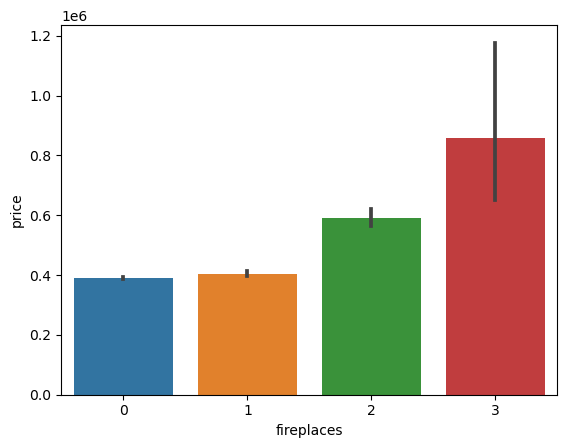

In [33]:
sns.barplot(zil, x='fireplaces', y='price')

<Axes: xlabel='pools', ylabel='price'>

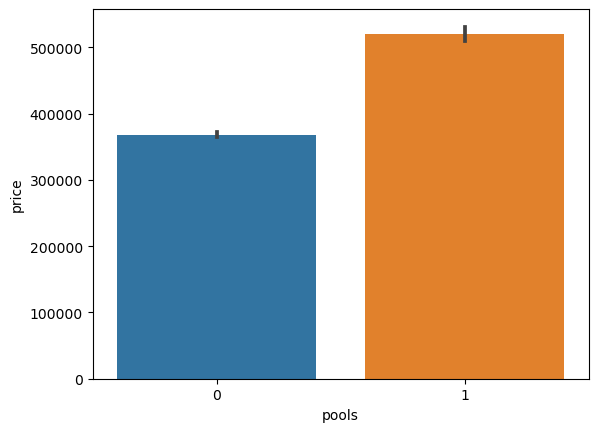

In [34]:
sns.barplot(zil, x='pools', y='price')

<Axes: xlabel='garages', ylabel='price'>

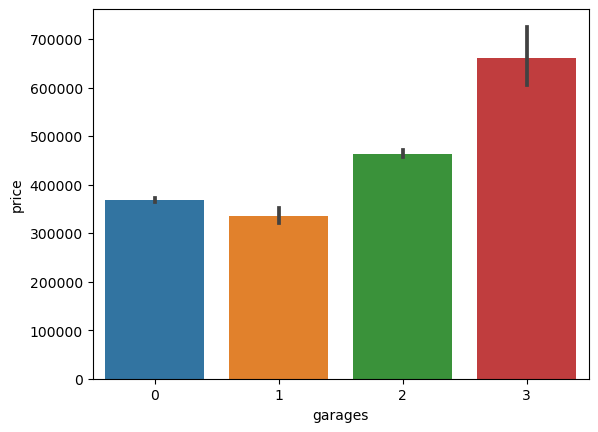

In [35]:
sns.barplot(zil, x='garages', y='price')

<Axes: xlabel='fips', ylabel='price'>

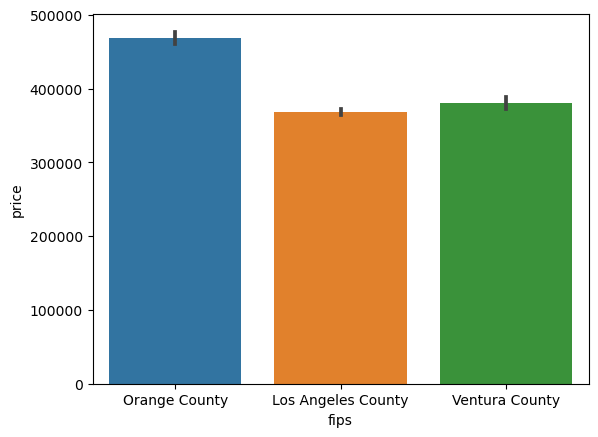

In [36]:
sns.barplot(zil, x='fips', y='price')